In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [2]:
print(tf.__version__)

1.12.0


# Load the IMDB dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Data analysis

In [4]:
x = train_data
print("Training Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = train_labels
print("Training Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = test_data
print("Test Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = test_labels
print("Test Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')

Training Data: 1 D Tensor, 25000 samples, object data type.
Training Labels: 1 D Tensor, 25000 samples, int64 data type.
Test Data: 1 D Tensor, 25000 samples, object data type.
Test Labels: 1 D Tensor, 25000 samples, int64 data type.


In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_labels[0])

1


In [7]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [8]:
# num_words=10000 => no word index will exceed 10000
max([max(sequence) for sequence in train_data])

9999

In [9]:
max([min(sequence) for sequence in train_data])

1

In [10]:
# Decode one review
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Preparing the data

One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix

In [11]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
x = x_train
print("Train Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = x_test
print("Test Data:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = y_train
print("Train Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')
x = y_test
print("Test Labels:", len(x.shape), 'D Tensor,', x.shape[0], 'samples,', x.dtype, 'data type.')

Train Data: 2 D Tensor, 25000 samples, float64 data type.
Test Data: 2 D Tensor, 25000 samples, float64 data type.
Train Labels: 1 D Tensor, 25000 samples, float32 data type.
Test Labels: 1 D Tensor, 25000 samples, float32 data type.


In [13]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [14]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


# Build the model

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)))
model.add(layers.Dense(16, activation=tf.nn.relu))
model.add(layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Model compilation

In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Create a validation set

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.4971 - binary_accuracy: 0.7935 - val_loss: 0.3769 - val_binary_accuracy: 0.8682
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2952 - binary_accuracy: 0.9033 - val_loss: 0.3028 - val_binary_accuracy: 0.8851
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2167 - binary_accuracy: 0.9280 - val_loss: 0.2767 - val_binary_accuracy: 0.8912
Epoch 4/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1732 - binary_accuracy: 0.9433 - val_loss: 0.2746 - val_binary_accuracy: 0.8903
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1397 - binary_accuracy: 0.9553 - val_loss: 0.2805 - val_binary_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1187 - binary_accuracy: 0.9615 - val_loss: 0.3000 - val_binary_

# Training logs

In [19]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


# Plotting the training and validation loss

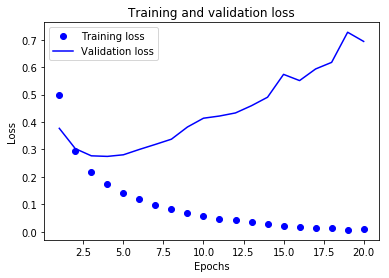

In [20]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

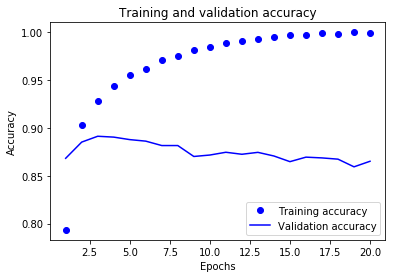

In [21]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model

In [22]:
result = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(result)

25000/25000 [==============================] - 2s 89us/step
['loss', 'binary_accuracy']
[0.7571749049401283, 0.84968]


# Generate predictions on new data

In [23]:
model.predict(x_test)

array([[0.00519115],
       [1.        ],
       [0.61171865],
       ...,
       [0.0022486 ],
       [0.01394674],
       [0.48049322]], dtype=float32)

# Experiments

- epochs = 4:    
    - loss: 0.1667 - binary_accuracy: 0.9457
    - val_loss: 0.2806 - val_binary_accuracy: 0.8866
    - test: ['loss', 'binary_accuracy'], [0.3049418957996368, 0.87748]
- epochs = 20: => overfitting
    - loss: 0.0048 - binary_accuracy: 0.9999
    - val_loss: 0.6767 - val_binary_accuracy: 0.8668
    - test: ['loss', 'binary_accuracy'], [0.7508390302133561, 0.84992]
- one single hidden layer: => slighty better results
    - loss: 0.2017 - binary_accuracy: 0.9378
    - val_loss: 0.2775 - val_binary_accuracy: 0.8911
    - test: ['loss', 'binary_accuracy'], [0.2949212053775787, 0.8838]
- three hidden layer: => same results
    - loss: 0.1651 - binary_accuracy: 0.9437
    - val_loss: 0.2816 - val_binary_accuracy: 0.8875
    - test: ['loss', 'binary_accuracy'], [0.30614593883037566, 0.87764]   
- 32 hidden units: => same results
    - loss: 0.1548 - binary_accuracy: 0.9471
    - val_loss: 0.2847 - val_binary_accuracy: 0.8883
    - test: ['loss', 'binary_accuracy'], [0.30995995416641237, 0.87768]
- 64 hidden units => slighty worse results
    - loss: 0.1476 - binary_accuracy: 0.9469
    - val_loss: 0.3003 - val_binary_accuracy: 0.8830
    - test: ['loss', 'binary_accuracy'], [0.33266343455791475, 0.87072] 
- mse loss function: => better loss values
    - loss: 0.0513 - binary_accuracy: 0.9454
    - val_loss: 0.0831 - val_binary_accuracy: 0.8887
    - test: ['loss', 'binary_accuracy'], [0.09009825669288635, 0.87836] 
- tanh activation: => worse results
    - loss: 0.1400 - binary_accuracy: 0.9517
    - val_loss: 0.3029 - val_binary_accuracy: 0.8804
    - test: ['loss', 'binary_accuracy'], [0.3346533358812332, 0.8694]
- sigmoid activation on all layers: => worse results
    - loss: 0.4229 - binary_accuracy: 0.8891
    - val_loss: 0.4172 - val_binary_accuracy: 0.8688
    - test: ['loss', 'binary_accuracy'], [0.42757924196243285, 0.86284]
